# Tarea 1: Análisis de señales usando la FFT

Para esta tarea considere la señal adjunta guardada en el archivo `elefante_ruidoso.dat`

Esta señal tiene valores complejos y fue muestreada a $100$ [Hz]

## Pregunta 1: Análisis preliminar (20%)

Responda
- ¿Cuántas muestras tiene la señal? ¿Cuál es la duración o largo temporal de la señal?

- ¿Cuál es la mayor frecuencia que podemos estudiar usando transformada de Fourier en este caso? Fundamente su respuesta

Muestre

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal en función del tiempo

- Una nube de puntos (`plt.scatter`) con la parte imaginaria de la señal en función de la parte real de la misma

Describa y clasifique la señal según los comportamientos que observa

### Cantidad de muestras de la señal: 2000 muestras
### Duración temporal de la señal: 20 segundos, donde cada muestra va en cada 0,01 sg
    
### La mayor frecuencia que podemos estudiar usando la transformada de Fourier es Fs/2 y -Fs/2, correspondientes a -50 y 50 [Hz], ya que nuestro Fs = 100 [Hz]
    
### La mayor frecuencia con mayor espectro de amplitud que podemos estudiar usando transformada de Fourier es:
### - En la frecuenta 1 Hz con espectro de amplitud 29095.71108497 (Tomamos este valor, ya que se encuentra en el lado positivo.)
### * Podemos apreciar la frecuencia de -1 Hz con espectro de amplitud 114172.07496405 (Se encuentra en el lado negativo.)

Loading BokehJS ...

2000 muestras dentro del archivo
20.0 segundos dura la muestra


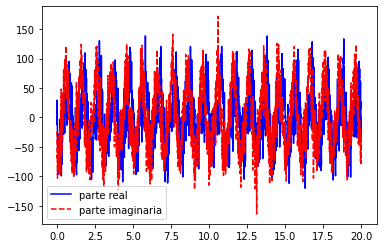

In [60]:
#Área de importación de librerías y más
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import scipy.fft as sfft

from IPython.display import YouTubeVideo, HTML, Audio
from bokeh.layouts import column, row
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import Figure, show, output_notebook

output_notebook()

#Abrimos el archivo
with open('elefante_ruidoso.npy', 'rb') as f:
    x = np.load(f)

#Sacamos la cantidad de muestras    
N = len(x)
print(N, "muestras dentro del archivo")

'''Declaramos Variables con respecto a los datos dados y obtenidos'''

Fs = 100 #Hz dado por la tarea 

#sacamos el tiempo de duración de la muestra
tiempo = N / Fs
print(tiempo, "segundos dura la muestra")


t = np.arange(0, tiempo, step=1./Fs); 
fr = sfft.fftshift(sfft.fftfreq(N, d=1./Fs)) #2000 muestras de 0,01 segundos cada una
S = sfft.fftshift(sfft.fft(x)); #Se utiliza el arreglo numpy ya dado


SA = np.absolute(S) #numerosComplejosenNumero
SP = np.angle(S) #numerosComplejosenAngulo


#CREACION DE ARREGLOS DE LAS PARTES REALES E IMAGINARIAS DE LOS VALORES EN X
r = np.array(x.real)
i = np.array(x.imag)

#Definimos el source para graficar
source = ColumnDataSource(data=dict(t=t,SA=SA/100,r=r,i=i))


#Gráficos
plt.plot(t, r, 'b-', t, i, 'r--')
plt.legend(('parte real', 'parte imaginaria'))
plt.show()


In [32]:
#Hacemos el gráfico de la parte real en función de la imaginaria
#Primero correr el primer código, luego este
p3 = Figure(plot_width=900, plot_height=200)
p3.scatter('i', 'r', source=source)
p3.xaxis[0].axis_label = 'Parte Imaginaria'
show(p3)

### Interpretación

# Pregunta 2: Análisis de Fourier (40%)

Escriba una función que reciba la señal y retorne el espectro de amplitud, el espectro de fase y las frecuencias asociadas a la señal.

Muestre dos gráficos con el espectro de amplitud y espectro de fase en función de la frecuencia, respectivamente. Comente sobre lo que observa

Escriba una función que reciba un número entero $M$ y que retorne un espectro de magnitud modificado donde los $M$ componentes mayores se mantienen y todos los demás se hacen igual a cero, retorne también el índice de los $M$ componentes mayores

Muestre graficamente el espectro de magnitud modificado con $M=7$. Imprima los valores de las frecuencias, amplitudes y fases de los $M$ componentes ordenados en orden descedente según su amplitud

In [33]:
#Funcion

def analisisFourier (Fs, x):

    frecuenciaMuestreo = Fs
    muestras = len(x)
    segundos = muestras/frecuenciaMuestreo

    tiempo = np.arange(0, segundos, step=1./frecuenciaMuestreo);

    frecuencia = sfft.fftshift(sfft.fftfreq(muestras, d=1./frecuenciaMuestreo)) 
    Sd = sfft.fftshift(sfft.fft(x));

    espectroAmplitud = np.absolute(Sd) 
    espectroFase = np.angle(Sd)
    
    return espectroAmplitud, espectroFase, frecuencia

#Guardamos los valores retornados de nuestra funcion en variables
espectroAmplitud, espectroFase, frecuencia = analisisFourier(Fs,x)

#Cargamos nuestros valores retornados
sourced = ColumnDataSource(data=dict(SAd=espectroAmplitud/100, SPd=espectroFase, fd=frecuencia))
 
p4 = Figure(plot_width=900, plot_height=200)
p4.line('fd', 'SAd', source=sourced, line_width=3, line_alpha=0.75)
p4.xaxis[0].axis_label = 'Frecuencia [Hz]'

p5 = Figure(plot_width=900, plot_height=200)
p5.line('fd', 'SPd', source=sourced, line_width=3, line_alpha=0.75)
p5.xaxis[0].axis_label = 'Frecuencia [Hz]'

#Muestra las gráficas
show(column(p4,p5))

In [56]:
#Funcion de M

def espectroMagnitudModificado (M):

    mask = np.argsort(espectroAmplitud)[-M:] # Ordena de menor a mayor y me quedo con las últimas dos
    espammod = [] #creamos un arreglo vacío para el espectro amplitud modificado
    
 
    for x in range (2000):
        if (x in mask) == True:
            espammod.append(espectroAmplitud[x]/100)
        else:
            espammod.append(0)  
    
    return espammod, mask 

#Con respecto a M=7
eam,mask = espectroMagnitudModificado(7)


sourcede = ColumnDataSource(data=dict(eam=eam, fr=frecuencia))

p6 = Figure(plot_width=900, plot_height=200)
p6.line('fr', 'eam', source=sourcede)
p6.xaxis[0].axis_label = 'Frecuencia [Hz]'

show(p6)

#Ordenar los arreglos

amplitud = espectroAmplitud[mask]/100
amplitudes = sorted(amplitud,reverse=True)
largo = len(amplitud)
fase = espectroFase[mask]
fases = []
frec = frecuencia[mask]
frecs = []
indices = []

for k in range (largo):
    y = 0
    v = True
    while v == True:
        if amplitudes[k] == amplitud[y]:
            fases.append(fase[y])
            frecs.append(frec[y])
            indices.append(mask[y])
            v = False
        else:
            y = y + 1

            
 #Hacer que ordene de mayor a menor segun amplitud!!!!!!!!!!!!!
print("El espectro de amplitud modificado es: ",amplitudes,"\n")
print("Las fases del espectro de amplitud modificado son: ",fases,"\n")
print("Con frecuencias en: ", frecs,"\n")

#print("Los índices del espectro de amplitud con M componentes son: ", indices,"\n")


El espectro de amplitud modificado es:  [1141.7207496405445, 290.95711084968076, 213.2697306032803, 205.9895161543908, 199.6434184965835, 146.30202810017138, 137.88414604929733] 

Las fases del espectro de amplitud modificado son:  [-1.2988694557983236, -2.8286161094867093, -3.0399687348263478, 1.1360540070406129, -1.9964989591343765, 0.10721681906939258, 0.04120390089895238] 

Con frecuencias en:  [-1.0, 1.0, 3.0, 2.0, -2.0, -5.0, 5.0] 



### Pregunta 3: Reconstrucción (40%)
Use la transformada de Fourier inversa para reconstruir la señal en base al espectro de amplitud modificado y el espectro de fase.

Para $M=[100, 10, 7, 5, 3, 1]$ (puede usar otros valores si lo considera necesario en su análisis) muestre

Una gráfica de linea (plt.plot) con las partes real e imaginaria de la señal reconstruida en función del tiempo

Una nube de puntos (plt.scatter) con la parte imaginaria en función de la parte real de la señal reconstruida

Describa y comente lo que observa, en particular compare cada resultado con el caso M=len(x) (caso original) y discuta sobre lo que ocurre para M>7, $M=7$ y M<7 con respecto al ruido y la información relevante de la señal ¿Pueden ver al elefante en el ruido?

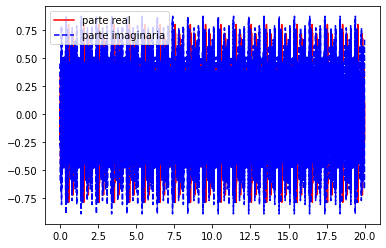

C:\Users\monin\miniconda3\lib\site-packages\IPython\lib\display.py:157: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [93]:
senal = [0]*2000
#Si rho y phi son la amplitud y ángulo de un número complejo, puedes reconstruir el número complejo usando c = rho*np.exp(1j*phi)


for i in indices:
    senal[i] = amplitud[indices.index(i)]*np.exp(1j*fase[indices.index(i)])

señal = np.array(senal)

inv = sfft.fftshift(sfft.ifft(señal)); #Se utiliza el arreglo numpy ya dado

#CREACION DE ARREGLOS DE LAS PARTES REALES E IMAGINARIAS DE LOS VALORES EN X
rea = np.array(inv.real)
ima = np.array(inv.imag)

SAA = np.absolute(señal) #numerosComplejosenNumero
SPP = np.angle(señal) #numerosComplejosenAngulos


source = ColumnDataSource(data=dict(t=t,r=rea,i=ima))


#Gráficos
plt.plot(t, rea, 'r-', t, ima, 'b--')
plt.legend(('parte real', 'parte imaginaria'))
plt.show()


In [68]:
print("LAS RISAS NO FALTARON! :D")

LAS RISAS NO FALTARON! :D
